In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from scipy.stats import shapiro, kstest, chisquare, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math
plt.rcParams["figure.figsize"] = (20,5)
# np.random.seed(42)  # для воспроизводимости результатов

# Генерация данных
n_samples = 200
x1 = np.random.uniform(-5,5, n_samples)
x2 = np.random.uniform(-5,5, n_samples)
x3 = np.random.uniform(-5,5, n_samples)
e = np.random.normal(0, 1, n_samples)  # случайный шум

# Рассчитываем отклик y
y = 1 + 3*x1 - 2*x2 + x3 +e

# Создаем DataFrame
data = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})


In [44]:

# # Добавляем столбец с единицами для свободного члена
# X = sm.add_constant(data[['x1', 'x2', 'x3']])
# y = data['y']

# # Строим модель
# model = sm.OLS(y, X).fit()

# # Выводим результаты регрессии
# print(model.summary())

In [45]:
lr = LinearRegression()
lr.fit(data[['x1','x2','x3']],data['y'])

LinearRegression()

In [46]:
err = y - lr.predict(data[['x1','x2','x3']])

In [47]:
ESS = sum((err)**2)
ESS

200.79160672913807

In [48]:
TSS = sum((y-np.mean(y))**2)
TSS

24202.608236672626

In [49]:
F_stat = ((TSS - ESS)/3)/(ESS/(n_samples - 3 - 1))
F_stat

7809.682446562554

In [50]:
R2 = 1 - ESS/TSS
R2

0.9917037203277582

In [51]:
r2_score(lr.predict(data[['x1','x2','x3']]),y)

0.9916343162759339

In [52]:
RSE = math.sqrt(ESS/(n_samples - 3 - 1)*ESS)
RSE

14.342257623509862

In [57]:
df = pd.read_csv('Global_annual_mean_temp.csv',low_memory=False)
df = df.drop_duplicates()


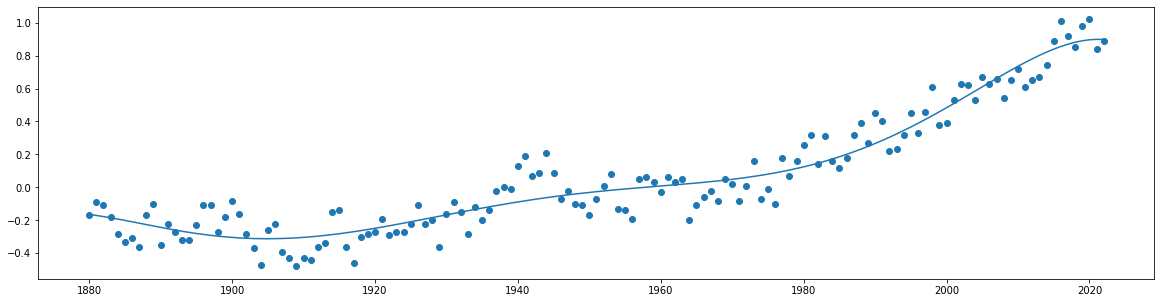

poly1d([-9.56753993e-12,  1.11650060e-07, -5.42795085e-04,  1.40715241e+00,
       -2.05162741e+03,  1.59508637e+06, -5.16640359e+08])

In [54]:
model = np.poly1d(np.polyfit(df['Year'], df['No_Smoothing'], 6))
plt.scatter(df['Year'], df['No_Smoothing'])
plt.plot(df['Year'], model(df['Year']))
plt.show()
model

In [58]:
def select_extension(predictor, corrector, right_border):
    for i in range(right_border):
        m = np.poly1d(np.polyfit(predictor, corrector, i))
        ess = sum((m(predictor) - corrector)**2)
        print(f"ESS x^{i} ", ess)

select_extension(df['Year'], df['No_Smoothing'], 7)

ESS x^0  19.226493706293713
ESS x^1  4.519526292721364
ESS x^2  1.9563211875966091
ESS x^3  1.8921050848585597
ESS x^4  1.7438309142747517
ESS x^5  1.6556419869907433
ESS x^6  1.569793782306401
